### Dot Plot - (General example)

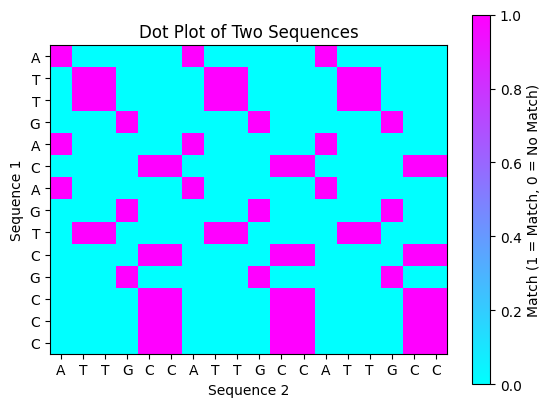

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sequences
seq1 = "ATTGACAGTCGCCC"
seq2 = "ATTGCCATTGCCATTGCC"

# Create a dot plot matrix
matrix = np.zeros((len(seq1), len(seq2)))

# Fill in the matrix: mark '1' when characters in both sequences match
for i in range(len(seq1)):
    for j in range(len(seq2)):
        if seq1[i] == seq2[j]:
            matrix[i, j] = 1

# Plot the dot plot with a colormap for better visualisation
plt.imshow(matrix, cmap='cool', interpolation='nearest')

# Add labels and title
plt.title('Dot Plot of Two Sequences')
plt.xlabel('Sequence 2')
plt.ylabel('Sequence 1')
plt.xticks(range(len(seq2)), seq2)
plt.yticks(range(len(seq1)), seq1)

# Show the plot
plt.colorbar(label='Match (1 = Match, 0 = No Match)')
plt.show()


### Dot plot with window size 3 and threshold 2

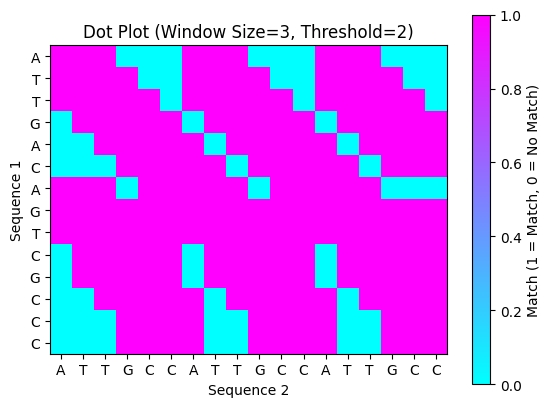

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sequences
seq1 = "ATTGACAGTCGCCC"
seq2 = "ATTGCCATTGCCATTGCC"

# Set the window size and threshold
window_size = 3
threshold = 2

# Create a dot plot matrix
matrix = np.zeros((len(seq1), len(seq2)))

# Fill in the matrix: check windows of size 'window_size' and count matches
for i in range(len(seq1) - window_size + 1):
    for j in range(len(seq2) - window_size + 1):
        # Extract windows from both sequences
        window1 = seq1[i:i + window_size]
        window2 = seq2[j:j + window_size]
        # Count matches in the windows
        match_count = sum(1 for a, b in zip(window1, window2) if a == b)
        # Mark '1' if the match count exceeds or equals the threshold
        if match_count >= threshold:
            matrix[i:i + window_size, j:j + window_size] = 1  # Apply matches across the window size

# Plot the dot plot with a colormap for better visualization
plt.imshow(matrix, cmap='cool', interpolation='nearest')

# Add labels and title
plt.title(f'Dot Plot (Window Size={window_size}, Threshold={threshold})')
plt.xlabel('Sequence 2')
plt.ylabel('Sequence 1')

# Set the x and y ticks to be the original sequences
plt.xticks(range(len(seq2)), seq2)
plt.yticks(range(len(seq1)), seq1)

# Show the plot
plt.colorbar(label='Match (1 = Match, 0 = No Match)')
plt.show()


#### 1) Consider the sequence “AGCTTAGCTAGGCTAATCGGATCGGCTTAGCTAAGCTTAGGCT”.
Create a dot matrix plot of the sequence against itself. Use a window size of 4 and a threshold of 3.
Modify the dot matrix analysis to check for inverted repeats by comparing the sequence with its reverse complement.
Use a window size of 5 and a threshold of 4.


## Increasing the word size decreases the noise!

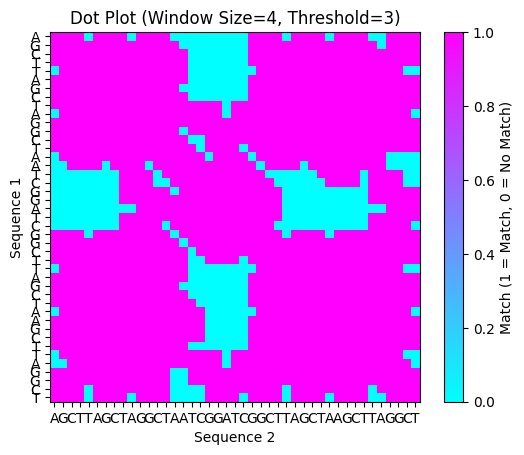

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sequences
seq1 = "AGCTTAGCTAGGCTAATCGGATCGGCTTAGCTAAGCTTAGGCT"
seq2 = "AGCTTAGCTAGGCTAATCGGATCGGCTTAGCTAAGCTTAGGCT"

# Set the window size and threshold
window_size = 4
threshold = 3

# Create a dot plot matrix
matrix = np.zeros((len(seq1), len(seq2)))

# Fill in the matrix: check windows of size 'window_size' and count matches
for i in range(len(seq1) - window_size + 1):
    for j in range(len(seq2) - window_size + 1):
        # Extract windows from both sequences
        window1 = seq1[i:i + window_size]
        window2 = seq2[j:j + window_size]
        # Count matches in the windows
        match_count = sum(1 for a, b in zip(window1, window2) if a == b)
        # Mark '1' if the match count exceeds or equals the threshold
        if match_count >= threshold:
            matrix[i:i + window_size, j:j + window_size] = 1  # Apply matches across the window size

# Plot the dot plot with a colormap for better visualization
plt.imshow(matrix, cmap='cool', interpolation='nearest')

# Add labels and title
plt.title(f'Dot Plot (Window Size={window_size}, Threshold={threshold})')
plt.xlabel('Sequence 2')
plt.ylabel('Sequence 1')

# Set the x and y ticks to be the original sequences
plt.xticks(range(len(seq2)), seq2)
plt.yticks(range(len(seq1)), seq1)

# Show the plot
plt.colorbar(label='Match (1 = Match, 0 = No Match)')
plt.show()



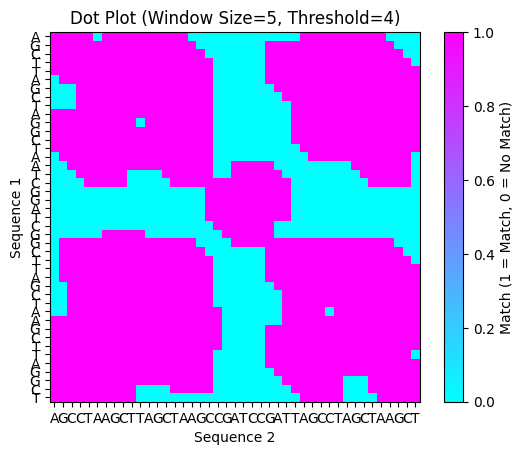

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the sequences
seq1 = "AGCTTAGCTAGGCTAATCGGATCGGCTTAGCTAAGCTTAGGCT"
seq2 = "AGCCTAAGCTTAGCTAAGCCGATCCGATTAGCCTAGCTAAGCT"

# Set the window size and threshold
window_size = 5
threshold = 4

# Create a dot plot matrix
matrix = np.zeros((len(seq1), len(seq2)))

# Fill in the matrix: check windows of size 'window_size' and count matches
for i in range(len(seq1) - window_size + 1):
    for j in range(len(seq2) - window_size + 1):
        # Extract windows from both sequences
        window1 = seq1[i:i + window_size]
        window2 = seq2[j:j + window_size]
        # Count matches in the windows
        match_count = sum(1 for a, b in zip(window1, window2) if a == b)
        # Mark '1' if the match count exceeds or equals the threshold
        if match_count >= threshold:
            matrix[i:i + window_size, j:j + window_size] = 1  # Apply matches across the window size

# Plot the dot plot with a colormap for better visualization
plt.imshow(matrix, cmap='cool', interpolation='nearest')

# Add labels and title
plt.title(f'Dot Plot (Window Size={window_size}, Threshold={threshold})')
plt.xlabel('Sequence 2')
plt.ylabel('Sequence 1')

# Set the x and y ticks to be the original sequences
plt.xticks(range(len(seq2)), seq2)
plt.yticks(range(len(seq1)), seq1)

# Show the plot
plt.colorbar(label='Match (1 = Match, 0 = No Match)')
plt.show()



### 2) Consider genomic sequence of a species.
Perform a self-comparison dot matrix analysis by comparing the sequence with itself and its reverse complement.
Implement a mechanism to detect palindromes and inverted repeats, where matches between the sequence and its reverse complement form off-diagonal patterns.
Visualize the dot matrix and annotate significant palindromic sequences and inverted repeats.
Filter out short random matches and focus on palindromes and repeats that are at least 10 base pairs in length.


### The plot shows a self-comparison dot matrix between the genomic sequence and its reverse complement.Palindromes and inverted repeats of length at least 10 base pairs are annotated with red lines.

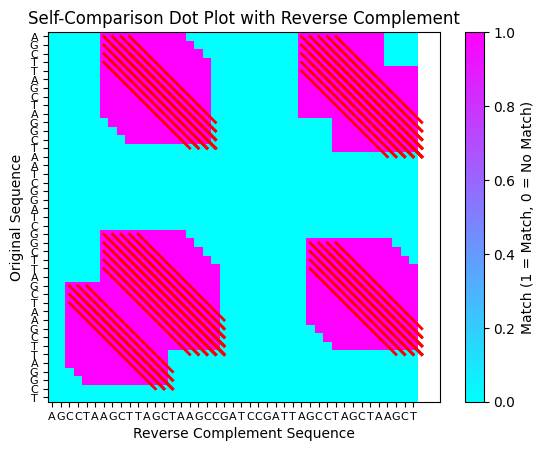

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to get the reverse complement of a DNA sequence
def reverse_complement(seq):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return ''.join(complement[base] for base in seq[::-1])

# Function to generate a dot plot matrix for comparison of sequence with its reverse complement
def generate_dot_matrix(seq, window_size, threshold, min_match_length):
    # Get reverse complement of the sequence
    rev_comp = reverse_complement(seq)

    # Create the dot plot matrix
    matrix = np.zeros((len(seq), len(rev_comp)))

    # Fill the matrix with matches of length >= window_size
    for i in range(len(seq) - window_size + 1):
        for j in range(len(rev_comp) - window_size + 1):
            # Extract windows from both the sequence and its reverse complement
            window_seq = seq[i:i + window_size]
            window_rev_comp = rev_comp[j:j + window_size]
            # Count matches in the windows
            match_count = sum(1 for a, b in zip(window_seq, window_rev_comp) if a == b)
            # Mark '1' if the match count exceeds or equals the threshold
            if match_count >= threshold:
                matrix[i:i + window_size, j:j + window_size] = 1

    return matrix, rev_comp

# Function to filter out short random matches and identify significant palindromic regions
def filter_significant_matches(matrix, seq, min_match_length):
    significant_palindromes = []
    length = len(seq)

    for i in range(length - min_match_length + 1):
        for j in range(length - min_match_length + 1):
            if matrix[i, j] == 1:
                # Check the length of consecutive matches
                match_length = 0
                while i + match_length < length and j + match_length < length and matrix[i + match_length, j + match_length] == 1:
                    match_length += 1

                # If the match length is at least min_match_length, consider it significant
                if match_length >= min_match_length:
                    significant_palindromes.append((i, j, match_length))

    return significant_palindromes

# Function to visualize the dot matrix and annotate significant palindromic sequences and inverted repeats
def visualize_dot_matrix(matrix, seq, rev_comp, significant_palindromes):
    plt.imshow(matrix, cmap='cool', interpolation='nearest')

    # Annotate significant palindromic sequences and inverted repeats
    for palindrome in significant_palindromes:
        i, j, match_length = palindrome
        plt.plot([j, j + match_length], [i, i + match_length], color='red', lw=2)

    # Add labels and title
    plt.title('Self-Comparison Dot Plot with Reverse Complement')
    plt.xlabel('Reverse Complement Sequence')
    plt.ylabel('Original Sequence')

    # Set the x and y ticks to be the original sequence and its reverse complement
    plt.xticks(range(len(rev_comp)), rev_comp, fontsize=8)
    plt.yticks(range(len(seq)), seq, fontsize=8)

    # Show the plot
    plt.colorbar(label='Match (1 = Match, 0 = No Match)')
    plt.show()

# Example genomic sequence (can be replaced with a longer one)
sequence = "AGCTTAGCTAGGCTAATCGGATCGGCTTAGCTAAGCTTAGGCT"

# Set parameters for the analysis
window_size = 10
threshold = 9  # Number of matching base pairs to consider a significant match
min_match_length = 10  # Minimum length of palindromic/inverted repeats to annotate

# Generate dot matrix and reverse complement
dot_matrix, reverse_complement_seq = generate_dot_matrix(sequence, window_size, threshold, min_match_length)

# Filter significant matches (palindromes and inverted repeats)
significant_palindromes = filter_significant_matches(dot_matrix, sequence, min_match_length)

# Visualize the dot matrix and annotate significant matches
visualize_dot_matrix(dot_matrix, sequence, reverse_complement_seq, significant_palindromes)


### 3) Consider two protein sequences
Compare the two protein sequences using a window size of 10 and a threshold of 8.
Implement a time-efficient algorithm to compute the dot matrix, focusing on improving the performance for large sequences.
Compare your algorithm with the naive O(n2) approach in terms of time complexity and runtime.

#### We can use a rolling hash technique to avoid comparing substrings character by character repeatedly. Instead, we compute hash values for windows of size 10, and compare the hashes, reducing the time spent on substring comparison. This approach improves the performance for large sequences.

Key Idea:
Hash the windows: Compute a hash for each window of size 10 in both sequences.
Compare hashes: Compare the hash values instead of the actual window contents.
Efficient window sliding: Use a rolling hash so that, when sliding the window, only one new character is added, and one old character is removed from the window. This allows us to update the hash in constant time
𝑂
(
1
)
O(1).
Threshold: Compare windows based on a threshold, ensuring that at least 8 out of 10 characters match in the windows.

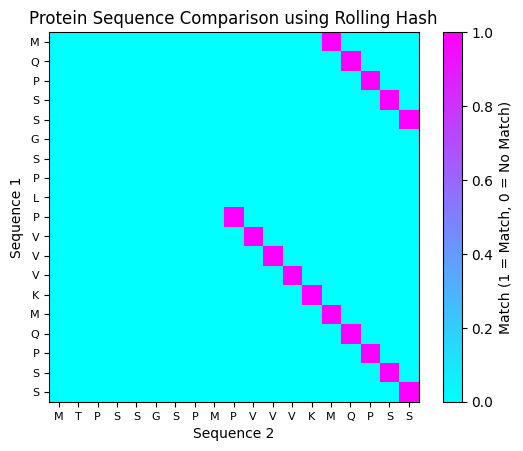

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rolling hash function for proteins
def rolling_hash(window):
    hash_val = 0
    for i, char in enumerate(window):
        hash_val += (ord(char) - ord('A') + 1) * (31 ** i)  # A simple hash function
    return hash_val

# Function to generate the dot matrix using rolling hash
def generate_rolling_hash_dot_matrix(seq1, seq2, window_size, threshold):
    n1, n2 = len(seq1), len(seq2)

    # Precompute hash values for all windows in seq1 and seq2
    hash_seq1 = [rolling_hash(seq1[i:i+window_size]) for i in range(n1 - window_size + 1)]
    hash_seq2 = [rolling_hash(seq2[j:j+window_size]) for j in range(n2 - window_size + 1)]

    # Create the dot matrix
    matrix = np.zeros((n1 - window_size + 1, n2 - window_size + 1))

    # Compare the hash values and compute matches
    for i in range(len(hash_seq1)):
        for j in range(len(hash_seq2)):
            # If hashes match, compare the actual windows for threshold-based matching
            if hash_seq1[i] == hash_seq2[j]:
                window_seq1 = seq1[i:i+window_size]
                window_seq2 = seq2[j:j+window_size]
                match_count = sum(1 for a, b in zip(window_seq1, window_seq2) if a == b)
                if match_count >= threshold:
                    matrix[i, j] = 1

    return matrix

# Function to visualize the dot matrix
def visualize_dot_matrix(matrix, seq1, seq2):
    plt.imshow(matrix, cmap='cool', interpolation='nearest')
    plt.title('Protein Sequence Comparison using Rolling Hash')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    # Adjust the number of ticks and labels to match the matrix dimensions
    plt.xticks(range(len(matrix[0])), seq2[:len(matrix[0])], fontsize=8)
    plt.yticks(range(len(matrix)), seq1[:len(matrix)], fontsize=8)
    plt.colorbar(label='Match (1 = Match, 0 = No Match)')
    plt.show()

# Example protein sequences
protein_seq1 = "MQPSSGSPLPVVVKMQPSSGSPLPVVVK"
protein_seq2 = "MTPSSGSPMPVVVKMQPSSGSPLPVVVK"

# Set parameters
window_size = 10
threshold = 8

# Generate dot matrix using rolling hash
dot_matrix = generate_rolling_hash_dot_matrix(protein_seq1, protein_seq2, window_size, threshold)

# Visualize the result
visualize_dot_matrix(dot_matrix, protein_seq1, protein_seq2)

Time Complexity of Rolling Hash Approach:
Rolling Hash Computation: Computing the hash for each window takes
𝑂
(
𝑤
𝑖
𝑛
𝑑
𝑜
𝑤
_
𝑠
𝑖
𝑧
𝑒
)
O(window_size), but with the rolling hash technique, after the first window, updating the hash for the next window takes
𝑂
(
1
)
O(1). Therefore, computing all the hashes for both sequences takes
𝑂
(
𝑛
1
+
𝑛
2
)
O(n1+n2).
Window Comparison: After the hash comparison, we check the actual window contents when the hashes match. Since the number of such matches is significantly reduced, the actual window comparison happens less frequently.
Thus, the time complexity of this optimized approach is approximately O(n1 + n2) for computing hashes and comparing them, plus O(k) comparisons for threshold validation (where
𝑘
k is the number of matching hash windows), which is much better than the naive
𝑂
(
𝑛
1
×
𝑛
2
)
O(n1×n2) approach.

Naive Approach Time Complexity:
In the naive approach, you would compare every window of size 10 in seq1 with every window of size 10 in seq2, resulting in a time complexity of
𝑂
(
𝑛
1
×
𝑛
2
×
𝑤
𝑖
𝑛
𝑑
𝑜
𝑤
_
𝑠
𝑖
𝑧
𝑒
)
O(n1×n2×window_size), where
𝑤
𝑖
𝑛
𝑑
𝑜
𝑤
_
𝑠
𝑖
𝑧
𝑒
=
10
window_size=10. Thus, it would be
𝑂
(
𝑛
1
×
𝑛
2
)
O(n1×n2).

Comparison Summary:
Naive Approach:
𝑂
(
𝑛
1
×
𝑛
2
)
O(n1×n2)
Optimized Rolling Hash Approach:
𝑂
(
𝑛
1
+
𝑛
2
)
O(n1+n2) for hashing + some
𝑂
(
𝑘
)
O(k) window comparisons.

### 4) Implement a dot matrix algorithm to compare each pair of sequences (i.e., Sequence1 vs. Sequence2, Sequence1 vs. Sequence3, and Sequence2 vs. Sequence3). Use a fixed window size of 15 nucleotides for comparison.
For each pairwise comparison, identify and extract regions of significant similarity. Define a conserved region as a region that is significantly matched in all pairwise comparisons.
Create a combined dot matrix visualization that highlights regions conserved across all sequences. Overlay this with annotations to show the conserved regions.
Plot individual dot matrices for each pairwise comparison and compare them with the combined visualization.


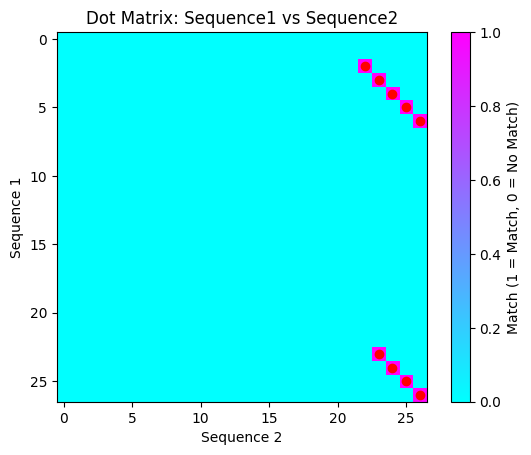

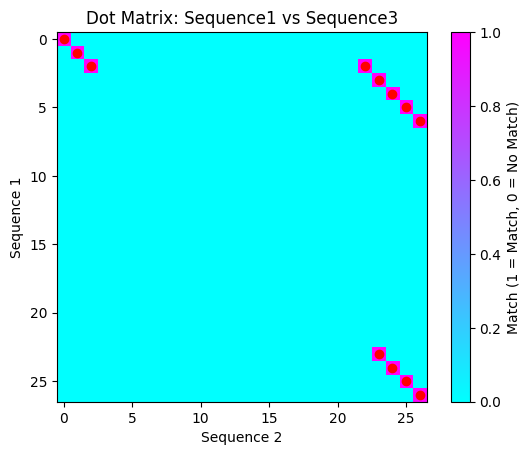

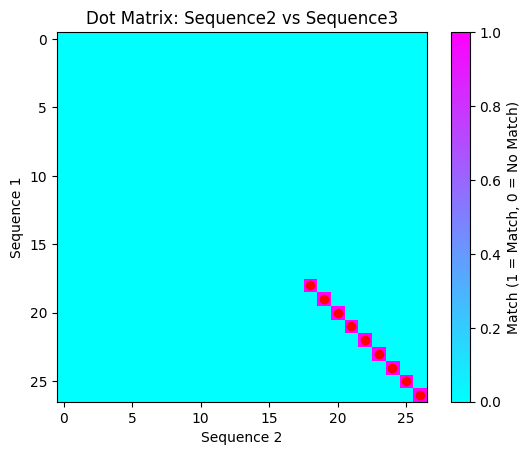

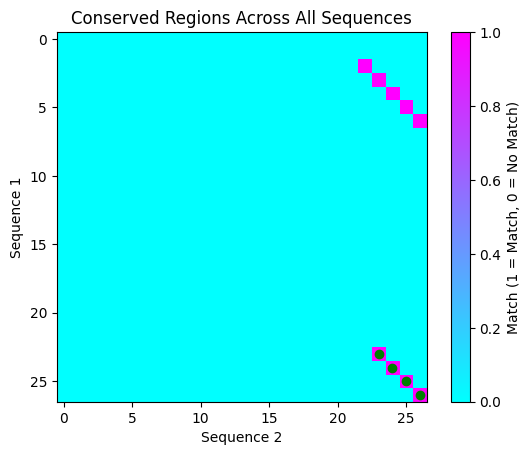

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a dot matrix for pairwise sequence comparison
def generate_dot_matrix(seq1, seq2, window_size, threshold):
    len1, len2 = len(seq1), len(seq2)
    matrix = np.zeros((len1 - window_size + 1, len2 - window_size + 1))

    # Compare windows from both sequences
    for i in range(len1 - window_size + 1):
        for j in range(len2 - window_size + 1):
            window1 = seq1[i:i + window_size]
            window2 = seq2[j:j + window_size]
            match_count = sum(1 for a, b in zip(window1, window2) if a == b)
            if match_count >= threshold:
                matrix[i, j] = 1
    return matrix

# Function to extract regions of significant similarity
def extract_significant_regions(matrix, window_size):
    significant_regions = []
    len1, len2 = matrix.shape

    for i in range(len1):
        for j in range(len2):
            if matrix[i, j] == 1:
                significant_regions.append((i, j, window_size))
    return significant_regions

# Function to find conserved regions across all comparisons
def find_conserved_regions(matrix1, matrix2, matrix3, window_size):
    conserved_regions = []
    len1, len2 = matrix1.shape

    for i in range(len1):
        for j in range(len2):
            if matrix1[i, j] == 1 and matrix2[i, j] == 1 and matrix3[i, j] == 1:
                conserved_regions.append((i, j, window_size))
    return conserved_regions

# Function to visualize the dot matrix
def visualize_dot_matrix(matrix, seq1, seq2, title, significant_regions=None, conserved_regions=None):
    plt.imshow(matrix, cmap='cool', interpolation='nearest')
    plt.title(title)
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')

    # Annotate significant regions (pairwise matches)
    if significant_regions:
        for region in significant_regions:
            i, j, _ = region
            plt.plot(j, i, 'ro')  # Red circles for significant regions

    # Annotate conserved regions (matches in all comparisons)
    if conserved_regions:
        for region in conserved_regions:
            i, j, _ = region
            plt.plot(j, i, 'go')  # Green circles for conserved regions

    plt.colorbar(label='Match (1 = Match, 0 = No Match)')
    plt.show()

# Example nucleotide sequences
sequence1 = "ATCGTTGACCTGGATCGAACGTCGAACGCCTGGATCGAACG"
sequence2 = "ATCGTTGACTGACTGGAGATCGAGATAACCTGGATCGAACG"
sequence3 = "ATCGTTGACCTGGAGTCCGGAGAGATAACCTGGATCGAACG"

# Parameters
window_size = 15
threshold = 12  # Minimum number of matching nucleotides in the window to consider a significant match

# Generate dot matrices for each pairwise comparison
dot_matrix_12 = generate_dot_matrix(sequence1, sequence2, window_size, threshold)
dot_matrix_13 = generate_dot_matrix(sequence1, sequence3, window_size, threshold)
dot_matrix_23 = generate_dot_matrix(sequence2, sequence3, window_size, threshold)

# Extract significant regions from each dot matrix
significant_12 = extract_significant_regions(dot_matrix_12, window_size)
significant_13 = extract_significant_regions(dot_matrix_13, window_size)
significant_23 = extract_significant_regions(dot_matrix_23, window_size)

# Identify conserved regions across all pairwise comparisons
conserved_regions = find_conserved_regions(dot_matrix_12, dot_matrix_13, dot_matrix_23, window_size)

# Visualize individual dot matrices with significant regions annotated
visualize_dot_matrix(dot_matrix_12, sequence1, sequence2, 'Dot Matrix: Sequence1 vs Sequence2', significant_regions=significant_12)
visualize_dot_matrix(dot_matrix_13, sequence1, sequence3, 'Dot Matrix: Sequence1 vs Sequence3', significant_regions=significant_13)
visualize_dot_matrix(dot_matrix_23, sequence2, sequence3, 'Dot Matrix: Sequence2 vs Sequence3', significant_regions=significant_23)

# Visualize the combined dot matrix with conserved regions annotated
visualize_dot_matrix(dot_matrix_12, sequence1, sequence2, 'Conserved Regions Across All Sequences', conserved_regions=conserved_regions)
